# Movie Critic Explorer Front End
## Created for SEDS FALL 2019

This project was created for.... this is how you use it....


### Import Relevant Packages

In [1]:
# pip install tabletext

In [2]:
import altair as alt
import clean_data
from ipywidgets import interact,widgets
import pandas as pd
import overall_rating
import sentiment_analysis
import visualization
import word_cloud

### Import Data

To use your own data here, simply replace the reference

In [3]:
MOVIES = pd.read_csv("../data/movies.dat", delimiter='\t')
REVIEWS = pd.read_csv('../data/reviews.csv')

### Clean Data

This puts the data in the correct format for use in the modules

In [4]:
SUB_MOVIES = clean_data.clean_movies(MOVIES)
REVIEWS_CLEAN = clean_data.clean_reviews(REVIEWS)
REVIEWS_MERGE = clean_data.merge_movies_reviews(REVIEWS_CLEAN,SUB_MOVIES)

### View Overall Shape of Review Scores Over User Specified Time.

This will show you a visualization of the average rating per year. From here, you can find a year of interest to dive further into. If you are runnning main.py instead of using jupyter notebook as the front end, this will export into your folder as overallratings.html.

*Select Year Range of Interest*


In [5]:
print('Please insert the start year of a range of interest')
start_year = int(input())

Please insert the start year of a range of interest
1990


In [6]:
print('Please insert the end year of a range of interest')

end_year = int(input())

Please insert the end year of a range of interest
2002


In [7]:
#Initialize ability to see visualization in Jupyter Notebook
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

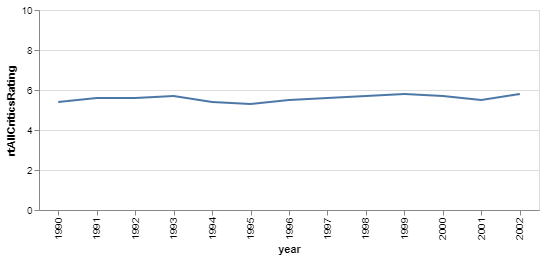

In [8]:
overall_rating.draw_trend_line_median_year(SUB_MOVIES,start_year,end_year)
#clean up axis and add title

### Select a Year of Interest to See Top Critics of that Year and Thier Sentiment

Did you see an interesting spike or valley? If so, maybe investigate that more to see what critics could be driving that change!
*Test to make sure it is in the correct range*

In [9]:
print('Please input a year of interest to see critic activity that year: ')
interest_year = int(input())

Please input a year of interest to see critic activity that year: 
2002


In [10]:
top_critics = overall_rating.top5_critic_per_year(REVIEWS_MERGE,interest_year)
print('The top critics that year are:')
pd.DataFrame(top_critics)
#add number of Reviews

The top critics that year are:


,0
0,Mick LaSalle
1,Joe Baltake
2,Mike Clark
3,Eleanor Ringel Gillespie
4,Todd McCarthy


### Grab Top Critic Reviews for Year of Interest and Analyze them for Sentiment

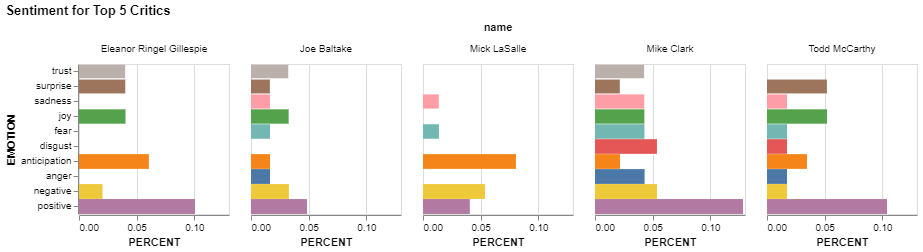

In [11]:
QUOTES = sentiment_analysis.grab_quotes(REVIEWS_MERGE,top_critics,interest_year)
EMOTION_ARRAY = sentiment_analysis.analyze_quote(QUOTES,top_critics)

visualization.visualize(EMOTION_ARRAY)

### Word Cloud for Top 5 Critic 

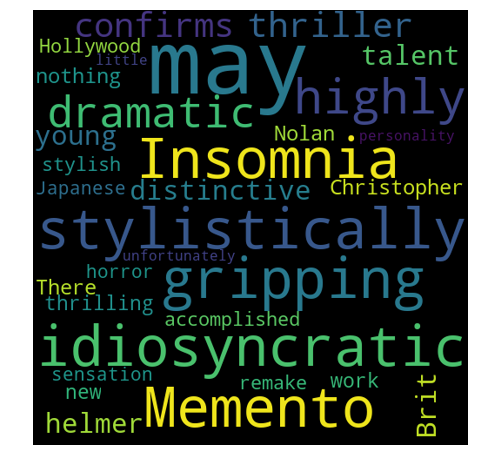

In [12]:
word_cloud.vis_word_cloud(QUOTES)